# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_recall_curve,roc_curve,make_scorer
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Data Overview

- Observations
- Sanity checks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/EasyVisa/EasyVisa.csv')

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
df.shape

(25480, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [9]:
#cols = ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [10]:
df['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

In [11]:
df['region_of_employment'].value_counts()

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

In [12]:
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [13]:
df['full_time_position'].value_counts()

Y    22773
N     2707
Name: full_time_position, dtype: int64

In [14]:
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

In [15]:
df['no_of_employees'].isnull().sum()

0

In [16]:
df['yr_of_estab'].isnull().sum()

0

In [17]:
df['prevailing_wage'].isnull().sum()

0

In [18]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

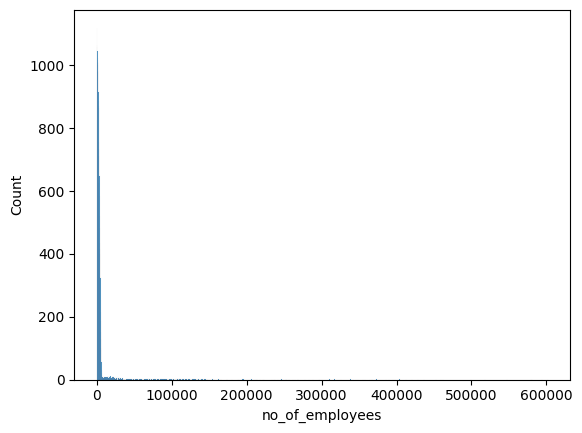

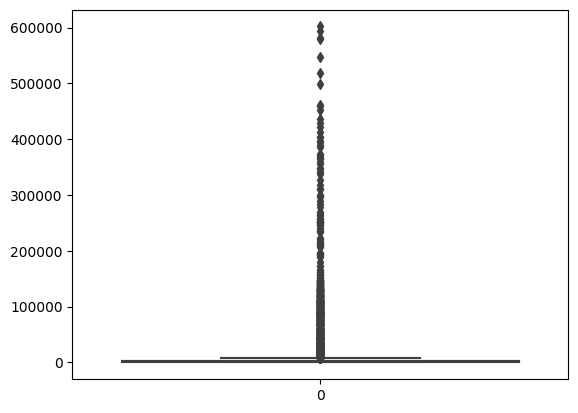

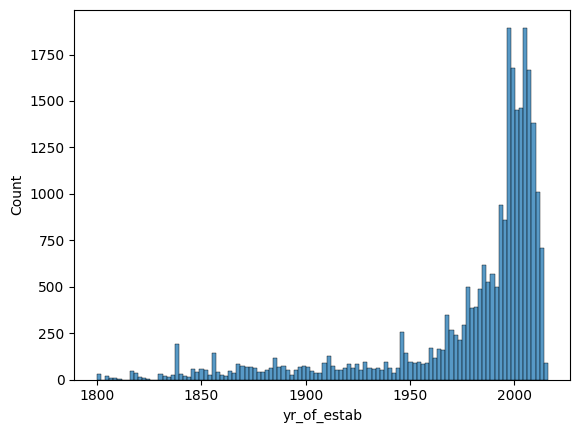

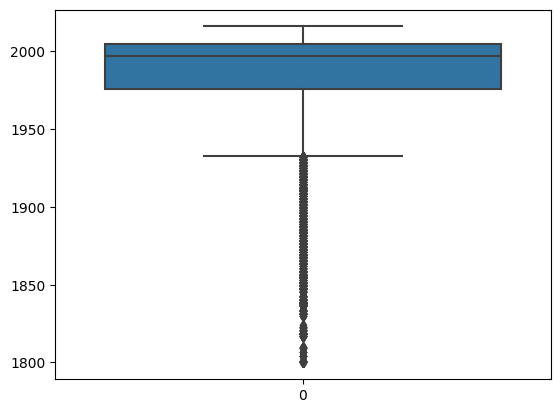

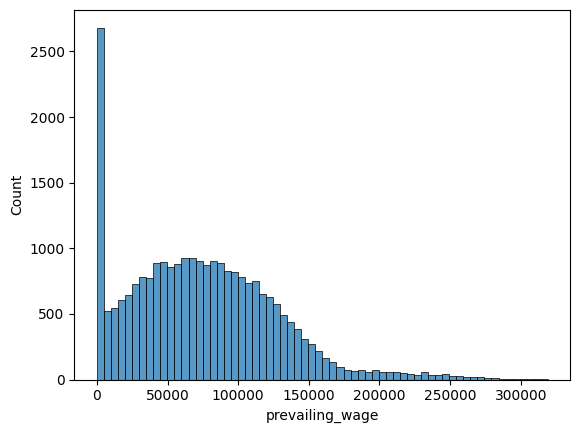

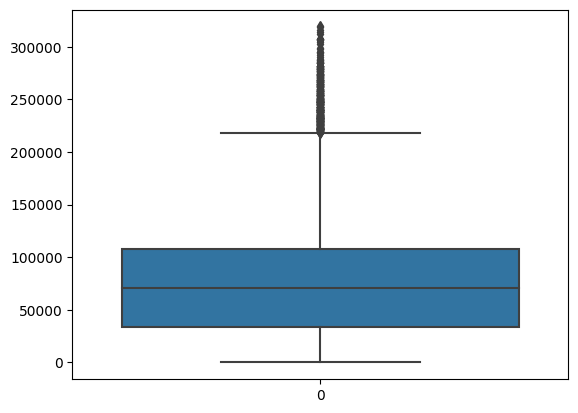

In [19]:
#Univariate analysis - numerical columns - histogram, boxplot

df_num = df.select_dtypes(include='number')
for i in df_num:
  sns.histplot(data=df_num[i])
  plt.show()
  sns.boxplot(data=df_num[i])
  plt.show()



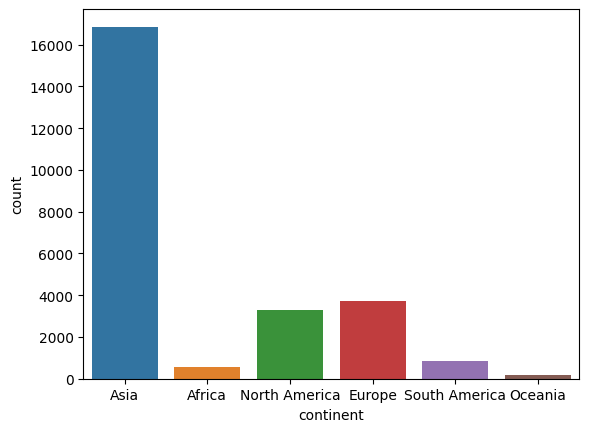

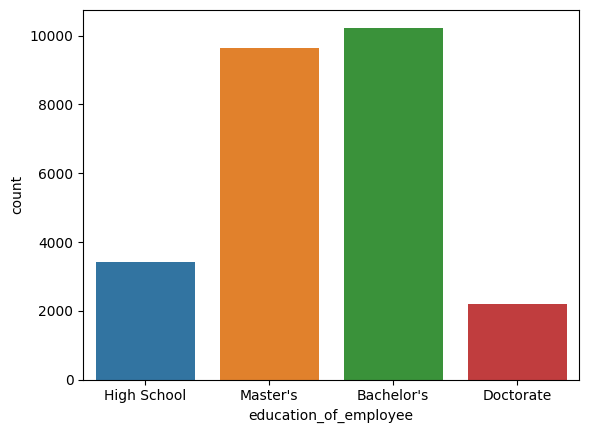

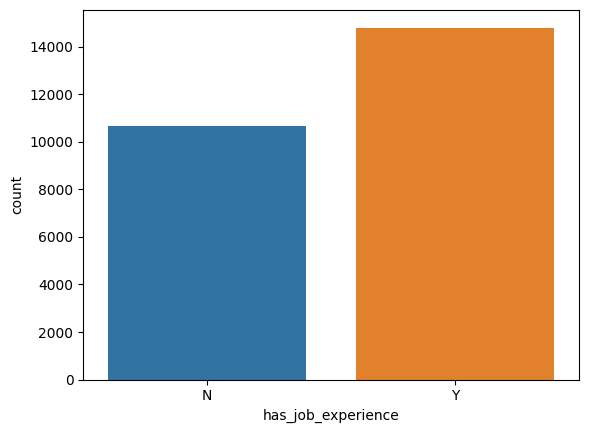

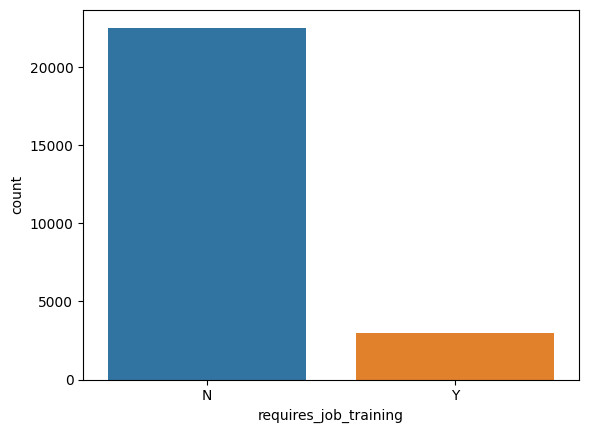

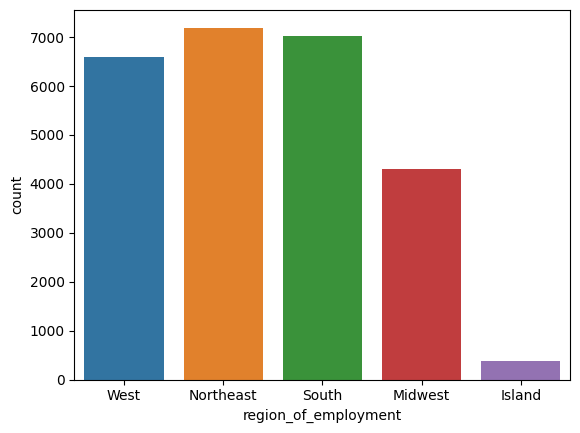

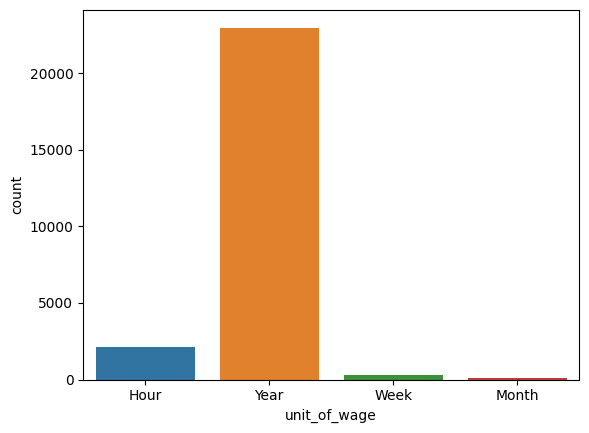

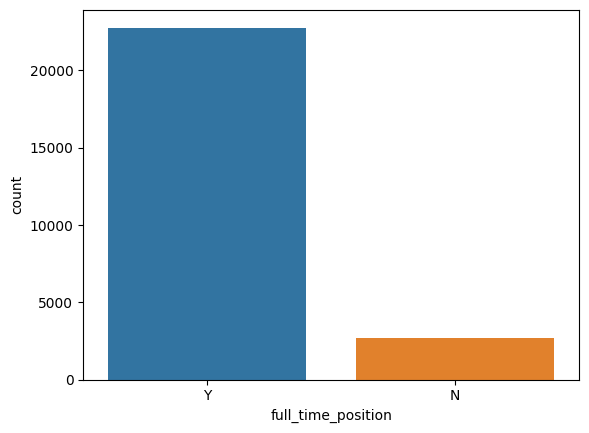

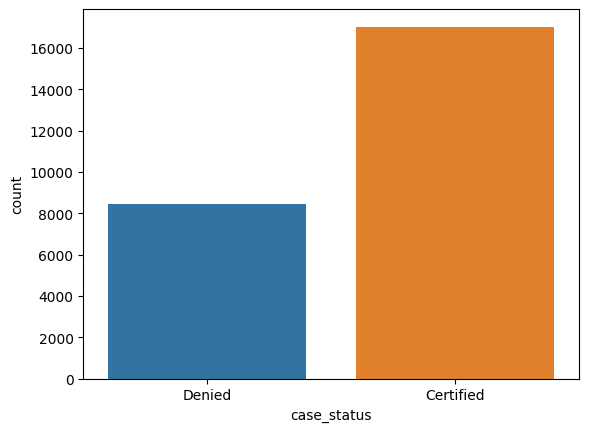

In [20]:
#Univariate analysis - categorical columns

df_cat = df.select_dtypes(exclude='number')
df_cat1 = df_cat.drop('case_id',axis=1)
for cols in df_cat1:
  sns.countplot(data=df_cat1,x=df_cat1[cols])
  plt.show()


<Axes: >

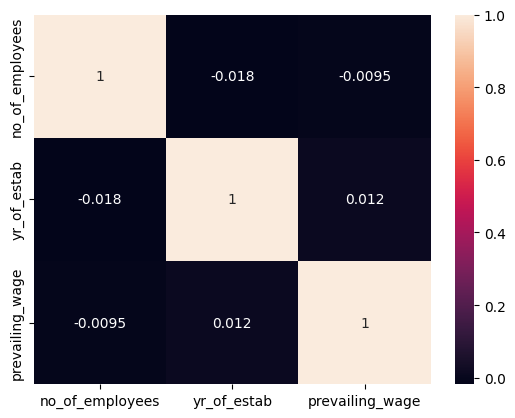

In [21]:
#Bivariate analysis
sns.heatmap(df.corr(),annot=True)

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [22]:
df_cat1

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,West,Hour,Y,Denied
1,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,Asia,Master's,Y,N,South,Year,N,Certified
25478,Asia,Master's,Y,Y,West,Year,Y,Certified


In [23]:
df_num

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


In [24]:
#Bivariate analysis - exog, endog
cat_col_excepttarget = df_cat1.drop('case_status',axis=1)
target = df['case_status']

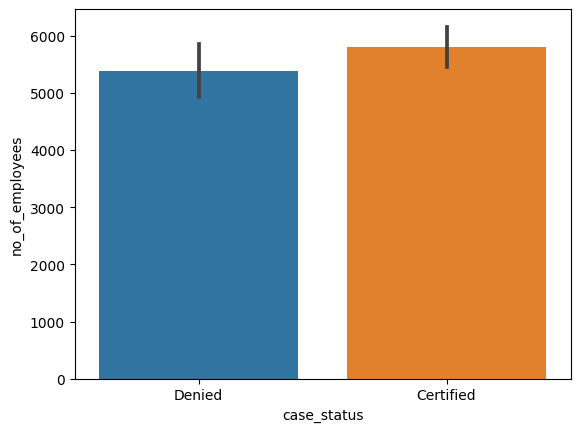

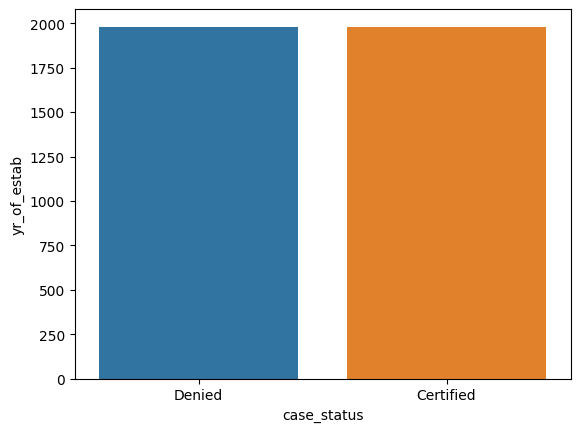

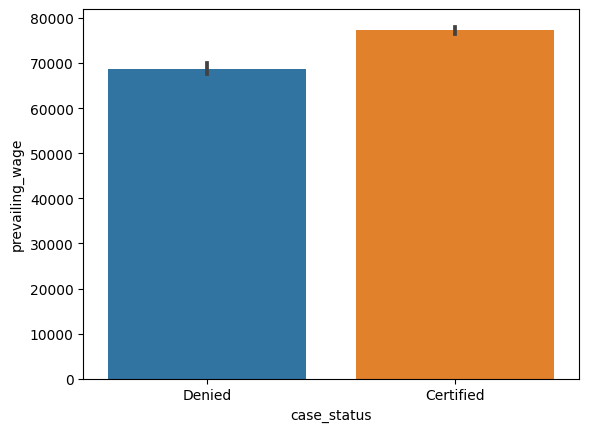

In [25]:
#target vs numerical columns
for col in df_num:
  plt.figure()
  sns.barplot(x=target, y= df_num[col])

<Axes: xlabel='case_status', ylabel='Count'>

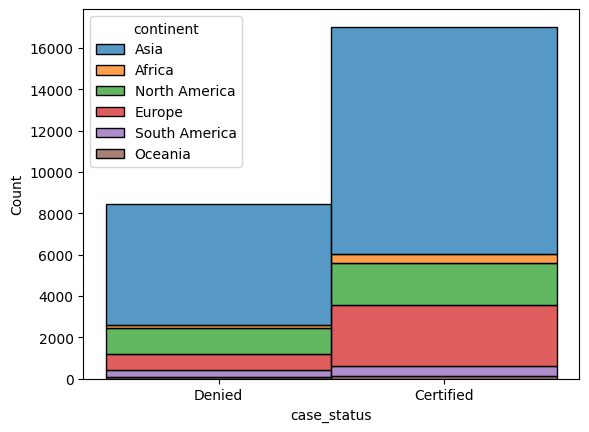

In [26]:
#target vs categorical columns
sns.histplot(x=target,hue='continent',data=df,multiple="stack")

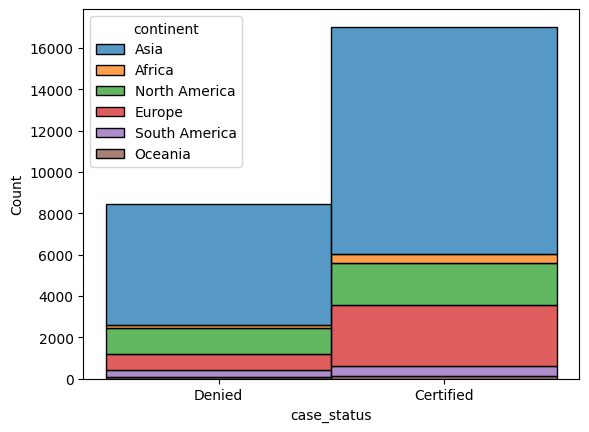

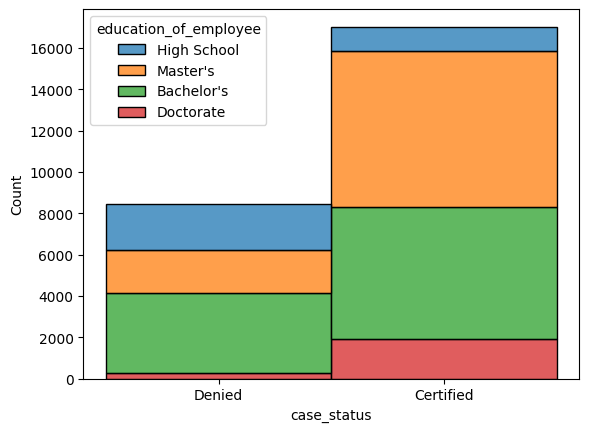

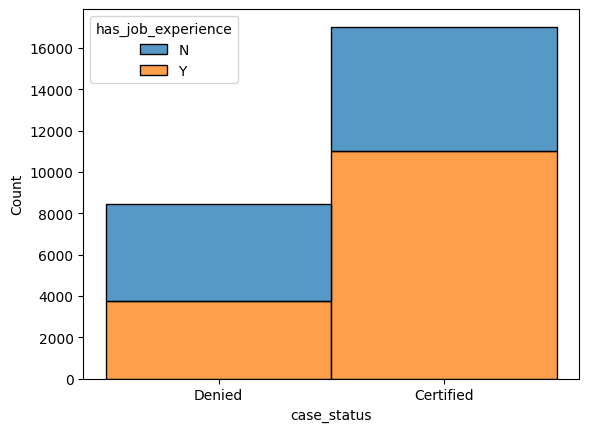

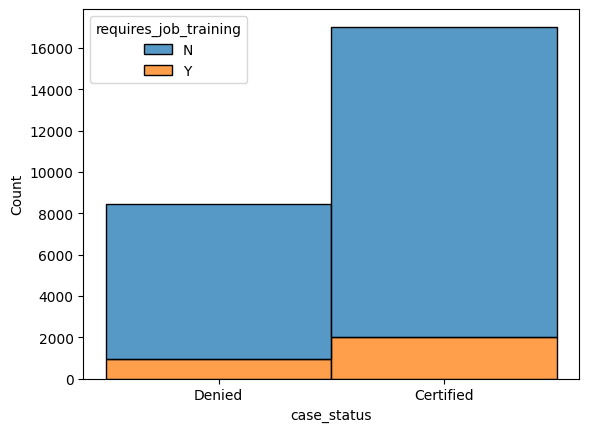

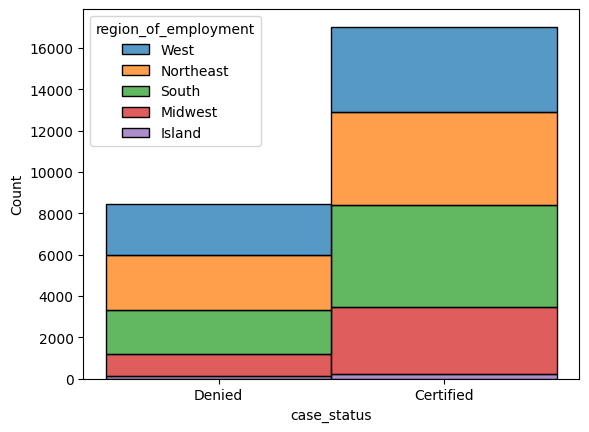

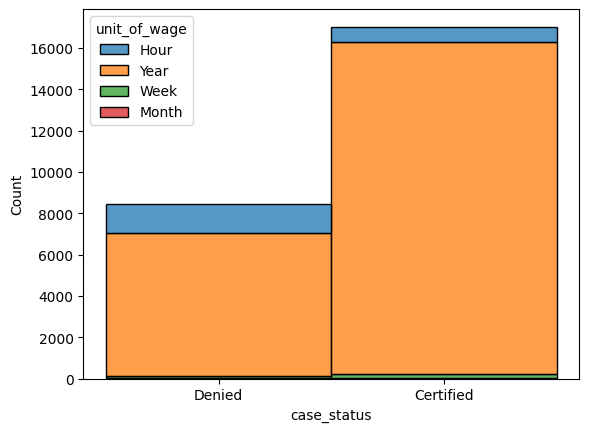

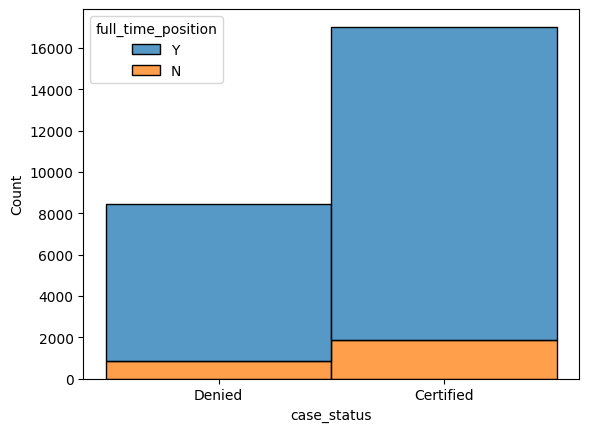

In [27]:
for i in cat_col_excepttarget:
  plt.figure()
  sns.histplot(x=target,hue=cat_col_excepttarget[i],data = cat_col_excepttarget,multiple='stack')

**Leading Questions:**

>Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

Yes. Education has significant importance in Visa. People with Masters and Bachelors are certified more than highschool graduates.

>How does the visa status vary across different continents?

Asia tops the most Visa granted continents followed by Europe and North America

>Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

Experience plays a vital role. People with experience are granted visa than people with no experience.

>In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

Annual

>The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Visa is granted for wage more than $70k.Less than  $70k is denied.

**EDA Observations:**
> Data set has 25480 rows and 12 columns

> Out of 12 columns, 3 are numerical and the rest are categorical

> Caseid column has unique value for each row. so, not very usefull in prediction. We may drop it

> Salary ranges between $50k to $120k

> Average salary is $74455.80

> Chances of visa grant increases with increase in salary

> Most of the companies are established around 1980 to 2010

> Visa applicants from Continent - Asia tops all continents, followed by Europe and North America

> Visa applicants with Bachelors degree tops the list, followed by Masters

> Number of Applicants having Job experience is relatively high. Chance of Visa approval is propotional to Job experience

> 90% of applicants have Job training. This also increases the rate of visa approval

> Most of the payrolls are Annual

> Full time employment tops the type of employment



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [28]:
#drop case_id
df_processed = df.copy()
df_processed = df.drop("case_id",axis=1)


In [29]:
df_processed

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [30]:
df_processed['continent'].isnull().sum()

0

In [31]:
for cols in df_processed:
  #print(cols)
  print("Null values in", cols,"is ",  end='')
  print(df_processed[cols].isnull().sum())



Null values in continent is 0
Null values in education_of_employee is 0
Null values in has_job_experience is 0
Null values in requires_job_training is 0
Null values in no_of_employees is 0
Null values in yr_of_estab is 0
Null values in region_of_employment is 0
Null values in prevailing_wage is 0
Null values in unit_of_wage is 0
Null values in full_time_position is 0
Null values in case_status is 0


In [32]:
df_processed['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

In [33]:
#Feature eng - replace yes/no with 1/0
#create dictionary and map the values
rep_jobexp = {'Y':'1','N':'0'}

df_processed['has_job_experience'] = df_processed['has_job_experience'].map(rep_jobexp).fillna(df_processed['has_job_experience'])
df_processed

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,1,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,0,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,0,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,1,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,1,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,1,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,1,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,1,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [34]:
rep_jobtraining ={'Y':'1','N':'0'}
df_processed['requires_job_training'] = df_processed['requires_job_training'].map(rep_jobtraining).fillna(df_processed['requires_job_training'])
df_processed

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,1,1,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,1,0,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,1,0,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,1,1,1918,1887,West,86154.7700,Year,Y,Certified


In [35]:
rep_fulltime = {'Y':'1','N':'0'}
df_processed['full_time_position'] = df_processed['full_time_position'].map(rep_fulltime).fillna(df_processed['full_time_position'])
df_processed

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,Denied
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,Certified
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,Denied
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,Denied
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,1,1,2601,2008,South,77092.5700,Year,1,Certified
25476,Asia,High School,1,0,3274,2006,Northeast,279174.7900,Year,1,Certified
25477,Asia,Master's,1,0,1121,1910,South,146298.8500,Year,0,Certified
25478,Asia,Master's,1,1,1918,1887,West,86154.7700,Year,1,Certified


In [36]:
rep_casestatus = {'Certified':'1','Denied':'0'}
df_processed['case_status'] = df_processed['case_status'].map(rep_casestatus).fillna(df_processed['case_status'])
df_processed

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,1,1,2601,2008,South,77092.5700,Year,1,1
25476,Asia,High School,1,0,3274,2006,Northeast,279174.7900,Year,1,1
25477,Asia,Master's,1,0,1121,1910,South,146298.8500,Year,0,1
25478,Asia,Master's,1,1,1918,1887,West,86154.7700,Year,1,1


In [37]:
# One hot encoding for categorical columns
df_processed = pd.get_dummies(df_processed, columns=['continent','education_of_employee','region_of_employment','unit_of_wage'])
df_processed

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,...,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,2412,2002,83425.6500,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,44444,2008,122996.8600,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,98,1897,83434.0300,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,1082,2005,149907.3900,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,1,2601,2008,77092.5700,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
25476,1,0,3274,2006,279174.7900,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
25477,1,0,1121,1910,146298.8500,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
25478,1,1,1918,1887,86154.7700,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1


In [38]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  object 
 1   requires_job_training              25480 non-null  object 
 2   no_of_employees                    25480 non-null  int64  
 3   yr_of_estab                        25480 non-null  int64  
 4   prevailing_wage                    25480 non-null  float64
 5   full_time_position                 25480 non-null  object 
 6   case_status                        25480 non-null  object 
 7   continent_Africa                   25480 non-null  uint8  
 8   continent_Asia                     25480 non-null  uint8  
 9   continent_Europe                   25480 non-null  uint8  
 10  continent_North America            25480 non-null  uint8  
 11  continent_Oceania                  25480 non-null  uin

In [39]:
# convert data types for required columns

df_processed[['has_job_experience','requires_job_training','full_time_position','case_status']] = df_processed[['has_job_experience','requires_job_training','full_time_position','case_status']].apply(pd.to_numeric)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  int64  
 3   yr_of_estab                        25480 non-null  int64  
 4   prevailing_wage                    25480 non-null  float64
 5   full_time_position                 25480 non-null  int64  
 6   case_status                        25480 non-null  int64  
 7   continent_Africa                   25480 non-null  uint8  
 8   continent_Asia                     25480 non-null  uint8  
 9   continent_Europe                   25480 non-null  uint8  
 10  continent_North America            25480 non-null  uint8  
 11  continent_Oceania                  25480 non-null  uin

In [40]:
# Split train and Test data
X = df_processed.drop(['case_status'],axis=1)
Y = df_processed['case_status']

In [41]:
X

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,...,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,2412,2002,83425.6500,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,44444,2008,122996.8600,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,98,1897,83434.0300,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,1082,2005,149907.3900,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,1,2601,2008,77092.5700,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
25476,1,0,3274,2006,279174.7900,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
25477,1,0,1121,1910,146298.8500,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
25478,1,1,1918,1887,86154.7700,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [42]:
Y

0        0
1        1
2        0
3        0
4        1
        ..
25475    1
25476    1
25477    1
25478    1
25479    1
Name: case_status, Length: 25480, dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

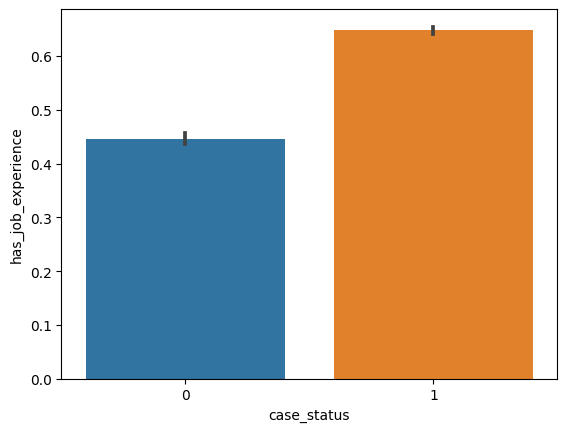

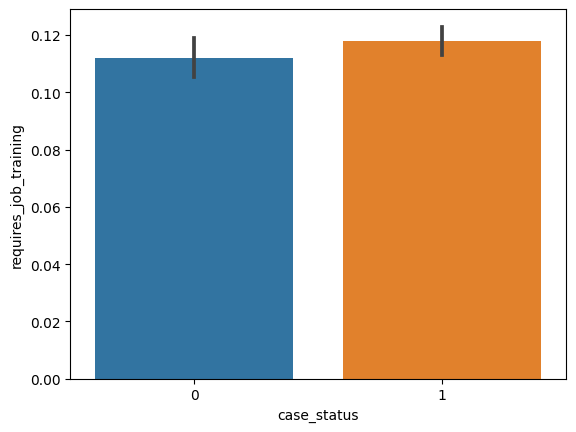

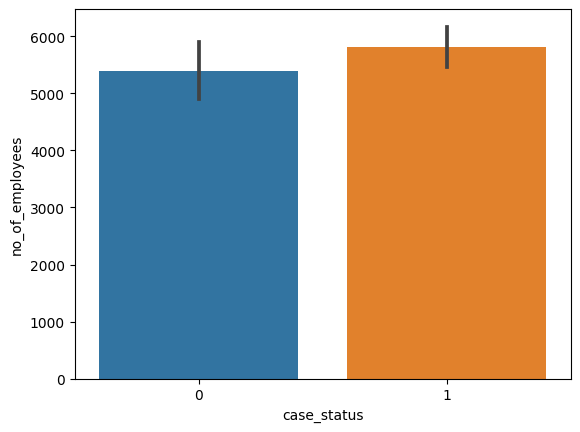

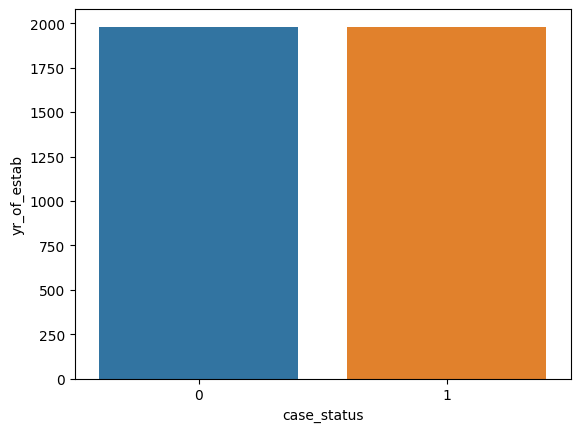

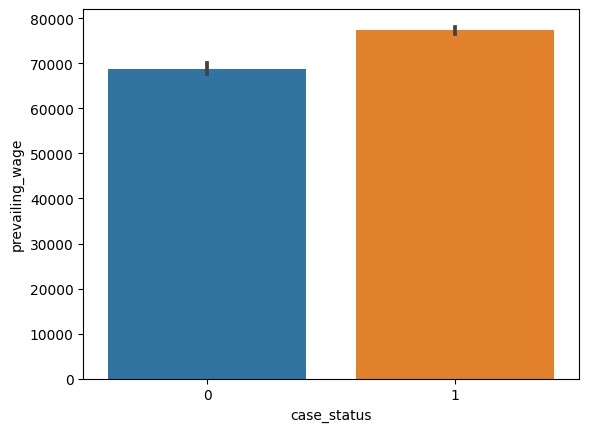

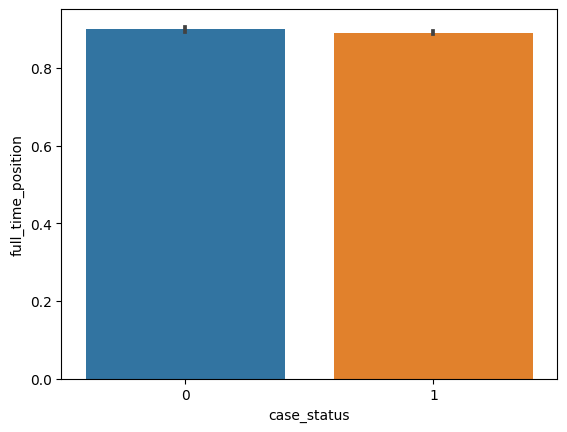

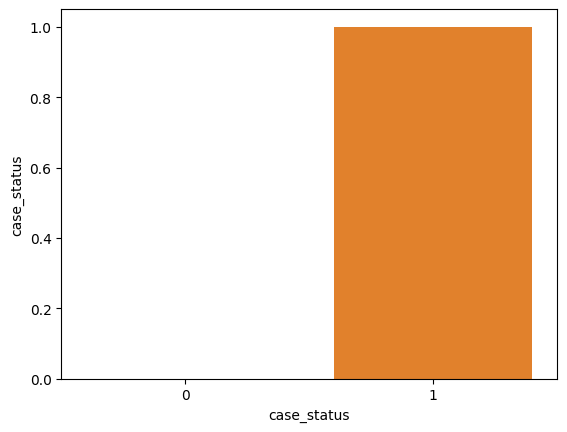

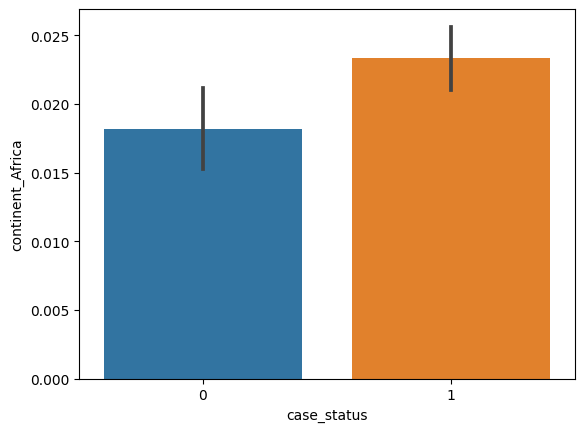

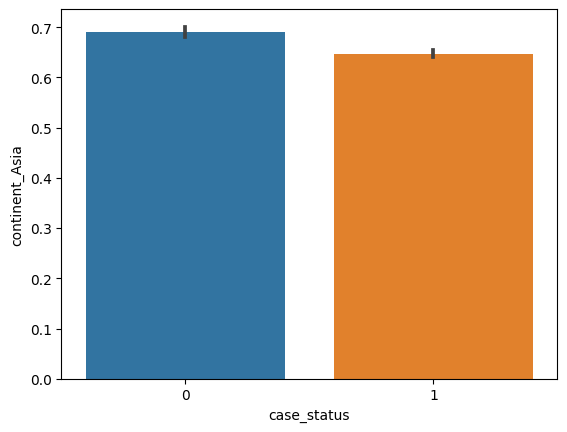

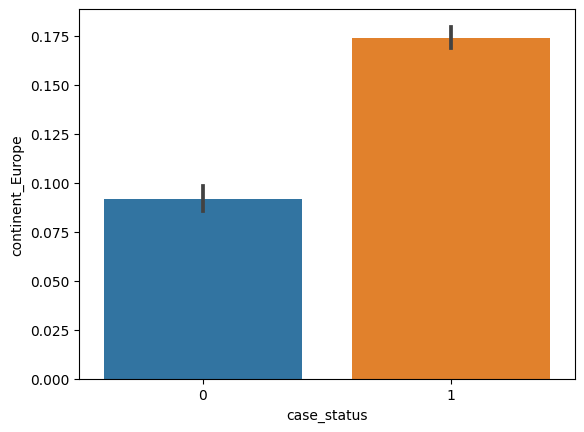

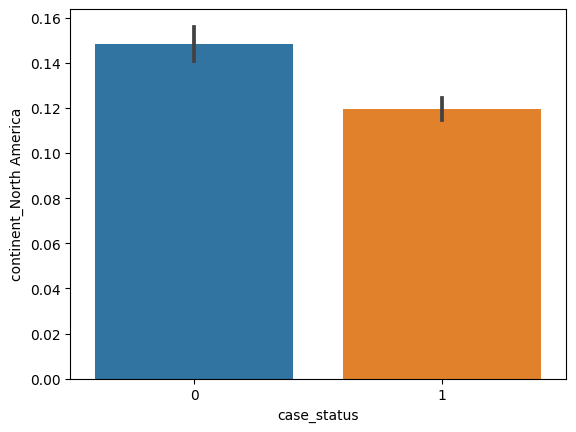

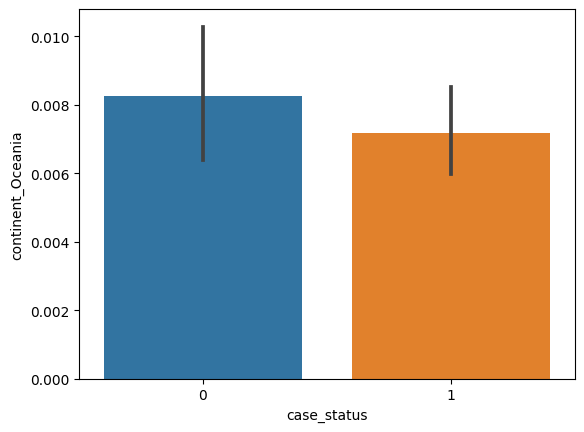

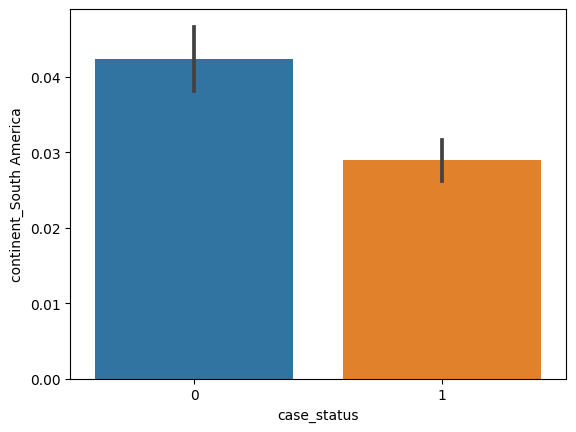

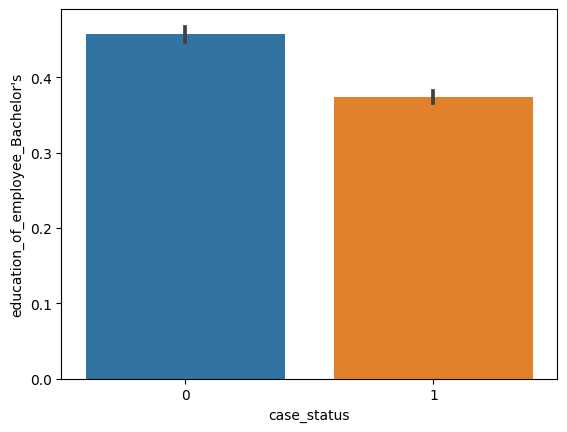

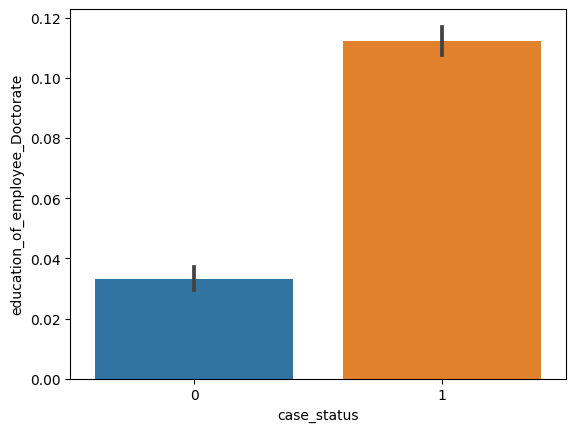

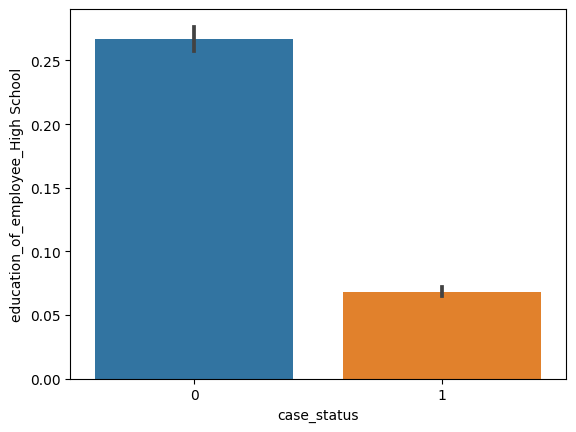

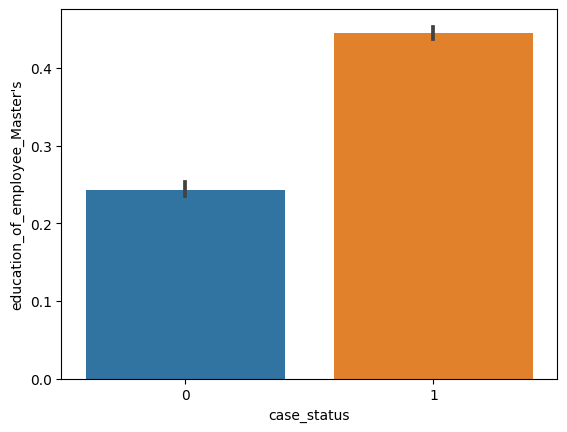

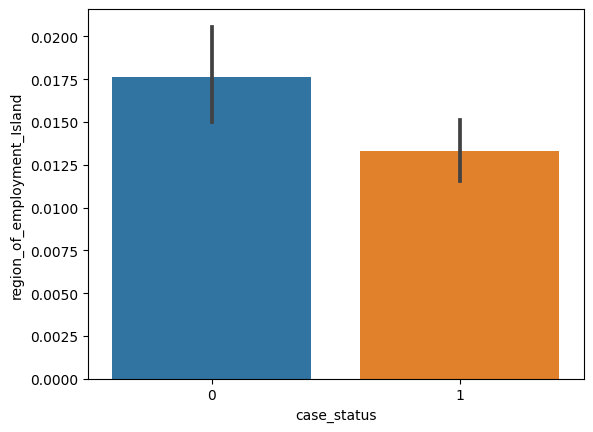

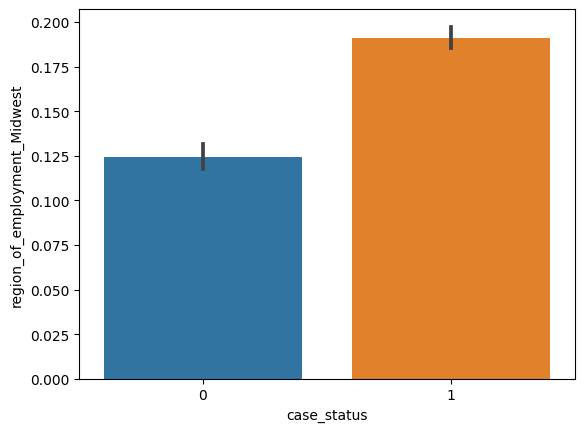

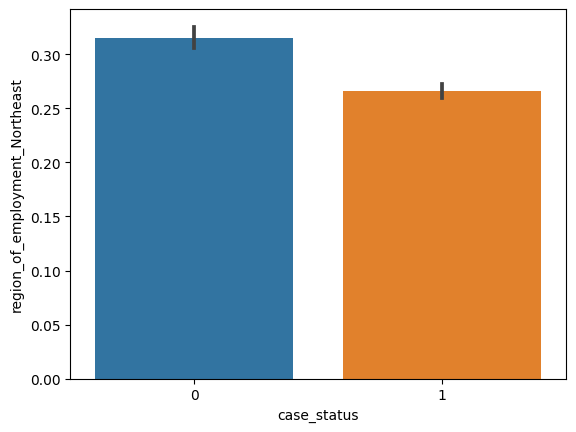

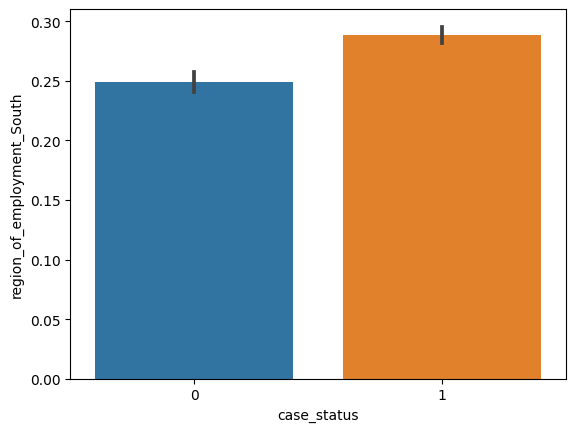

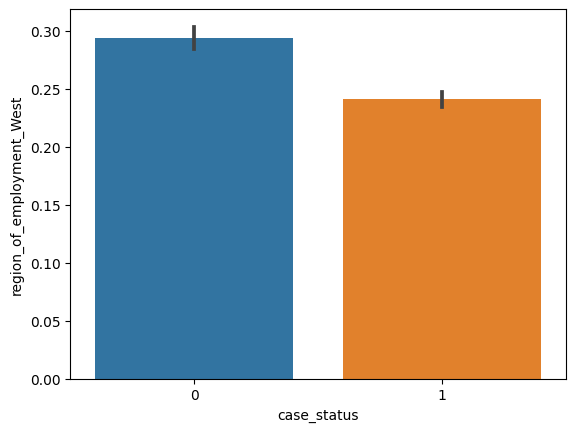

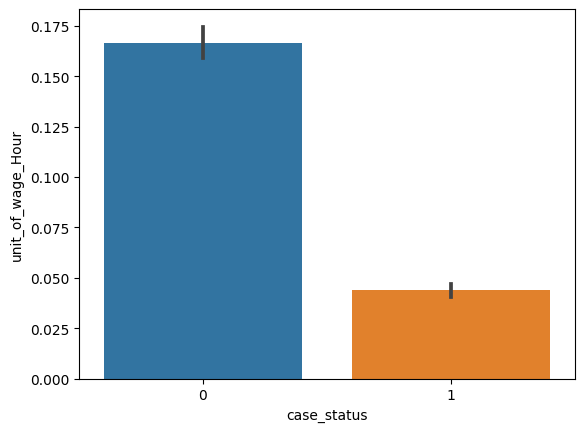

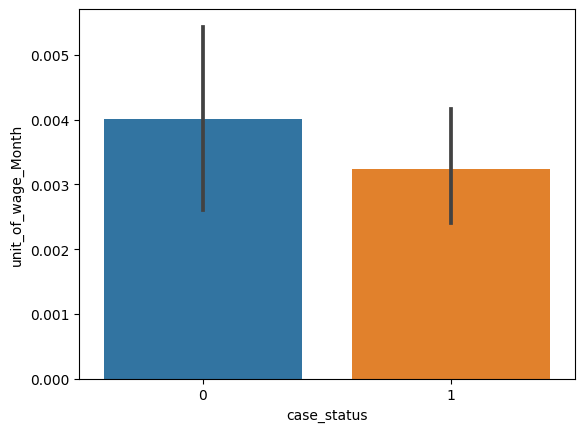

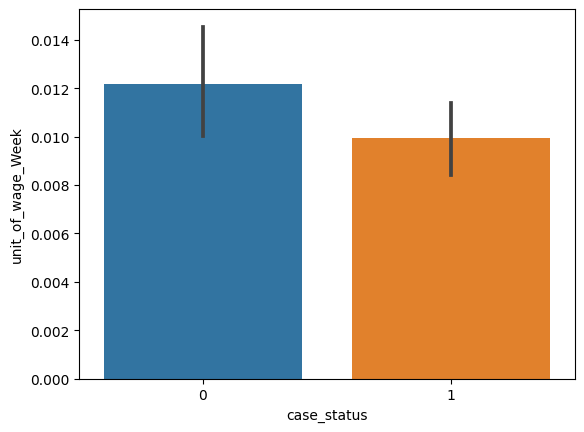

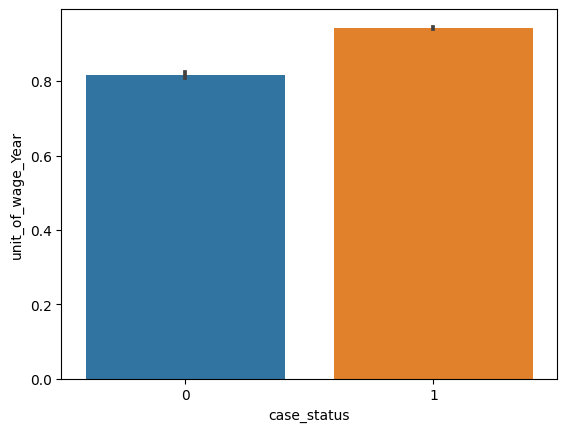

In [43]:
for col in df_processed:
  plt.figure()
  sns.barplot(x=Y, y= df_processed[col])

## Building bagging and boosting models

In [44]:
#Split Test and Train data sets
X_test,X_Train,Y_test,Y_train = train_test_split(X,Y,train_size=0.3,random_state=1)
print(X_test.shape,X_Train.shape)

(7644, 25) (17836, 25)


In [45]:
print(Y_test.shape,Y_train.shape)

(7644,) (17836,)


In [46]:
Y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [47]:
Y_test.value_counts(1)

1    0.659341
0    0.340659
Name: case_status, dtype: float64

In [48]:
# Metrics calculation
def metrics_classification(model,predictor,target):

  pred = model.predict(predictor)

  accuracy = accuracy_score(target,pred)
  precision = precision_score(target,pred)
  recall = recall_score(target,pred)
  f1 = f1_score(target,pred)

  df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

  return df_perf


In [49]:
# Confusion matrix
def confusion_matrix_sklearn(model,predictor,target):
  pred2 = model.predict(predictor)

  conf_matrix = confusion_matrix(target,pred2)
  plt.figure(figsize=(6, 4))

  labels = np.asarray(
      [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / conf_matrix.flatten().sum())]
            for item in conf_matrix.flatten()
      ]
  ).reshape(2, 2)

  sns.heatmap(conf_matrix, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

**Model evaluation criteria:**

> Predicting a person is suitable for Visa, but visa NOT granted - False positive

> Predicting a person is not suitable for Visa, but he is granted Visa - False negative

**Important case:**

> False negative - If a person not suitable is granted visa, we may incur financial loss, loss in quality of work and loss of employment for a qualified person

**Focus:**

> Recall should be increased, focus is to increase the true positives. i.e., identifying the right talent and granting visa.

In [50]:
#Decision tree

dtree = DecisionTreeClassifier(criterion='gini')

In [51]:
dtree.fit(X_Train,Y_train)

DecisionTreeClassifier()

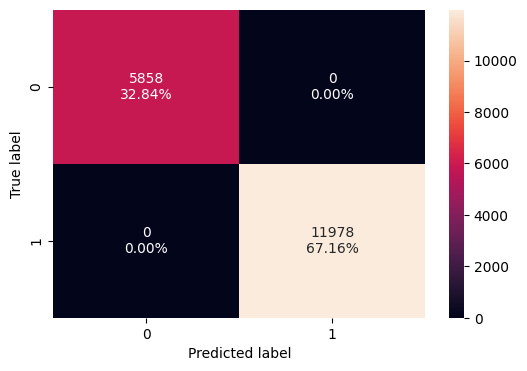

In [52]:
confusion_matrix_sklearn(dtree,X_Train,Y_train)

**Confusion matrix details:**

> True positive - Model predicted the person eligible for visa and he is granted visa - Predicted label:1, True label:1

> False positive - Model predicted the person is eligible for visa and he is NOT granted visa - Predicted:1, True:0

>True negative - Model predicted not eligible for visa and the person is NOT granted visa - Predicted:0,True:0

> False negative - Model predicted not eligible, but the person is granted visa - Predicted:0, True:1


In [53]:
# Metrics - Training data

print('***** Training Metrics*****\n')
dtree_classification_training_metrics = metrics_classification(dtree,X_Train,Y_train)


***** Training Metrics*****



***** Test Metrics*****



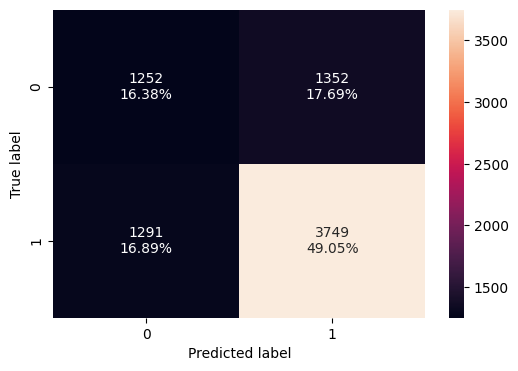

In [54]:
# Test data

confusion_matrix_sklearn(dtree,X_test,Y_test)


print('***** Test Metrics*****\n')
dtree_classification_testing_metrics = metrics_classification(dtree,X_test,Y_test)

> Desicion tree model is overfitting and Recall is low.


In [55]:
# Hyperparameter tuning - Decision tree
#Choose type of classifier
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.7,1:0.3},random_state=1)

#Choose parameters
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

#Choose scoring metric
Scoringmetric = metrics.make_scorer(metrics.recall_score)

#Hyperparameter tuning technique - gridsearch
grid_obj = GridSearchCV(dtree_tuned,param_grid,scoring=Scoringmetric, n_jobs=-1)
grid_obj.fit(X_Train,Y_train)

#Set the model to have best combination of parameters
dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_Train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

***** Test Metrics*****



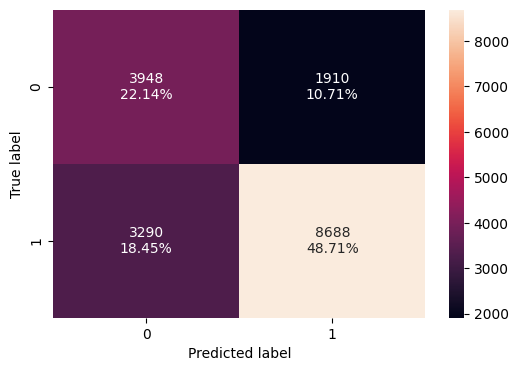

In [56]:
# Training data

confusion_matrix_sklearn(dtree_tuned,X_Train,Y_train)


print('***** Test Metrics*****\n')
dtree_tuned_training_metrics = metrics_classification(dtree_tuned,X_Train,Y_train)

***** Test Metrics*****



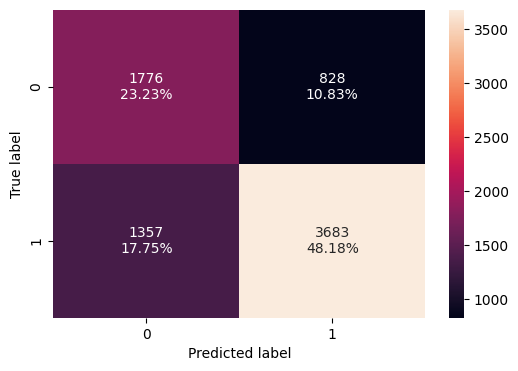

In [57]:
# Test data

confusion_matrix_sklearn(dtree_tuned,X_test,Y_test)


print('***** Test Metrics*****\n')
dtree_tuned_testing_metrics  = metrics_classification(dtree,X_test,Y_test)

> Hyper parameter tuning has decreased overfitting, but the Recall value remains almost same.

In [58]:
# Bagging

bagging = BaggingClassifier(random_state=1)
bagging.fit(X_Train,Y_train)

BaggingClassifier(random_state=1)

***** Test Metrics*****



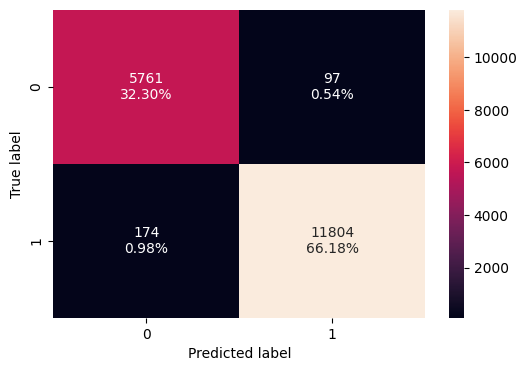

In [59]:
# Bagging Metrics - Training data

confusion_matrix_sklearn(bagging,X_Train,Y_train)


print('***** Test Metrics*****\n')
bagging_classifier_training_metrics = metrics_classification(bagging,X_Train,Y_train)

***** Bagging - Test Metrics*****


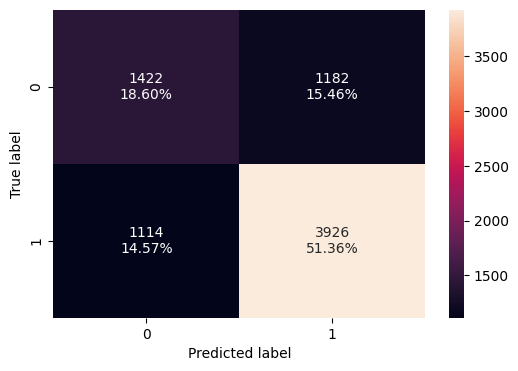

In [60]:
# Bagging Mtrics - Test data

confusion_matrix_sklearn(bagging,X_test,Y_test)
print('***** Bagging - Test Metrics*****')
bagging_classifier_testing_metrics = metrics_classification(bagging,X_test,Y_test)


> Bagging - this model is overfitting. Let's try Hyper parameter tuning.


In [61]:
# Bagging - Hyperparameter tuning

bagging_tuned = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.7,1:0.3},random_state=1),random_state=1)

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

scorer_metric = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned,param_grid, scoring=scorer_metric, n_jobs=-1)
grid_obj.fit(X_Train,Y_train)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_Train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.7,
                                                                      1: 0.3},
                                                        random_state=1),
                  max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

***** Test Metrics*****



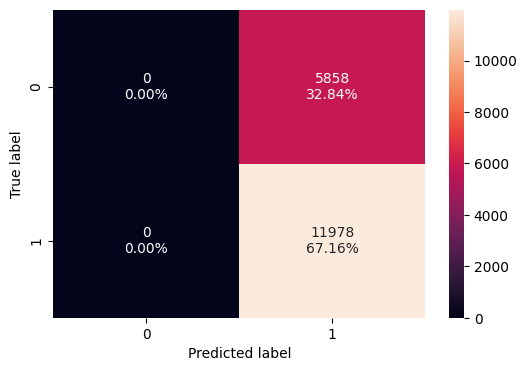

In [62]:
#Metrics - Training data
confusion_matrix_sklearn(bagging_tuned,X_Train,Y_train)


print('***** Test Metrics*****\n')
bagging_tuned_training_metrics = metrics_classification(bagging_tuned,X_Train,Y_train)

***** Test Metrics*****



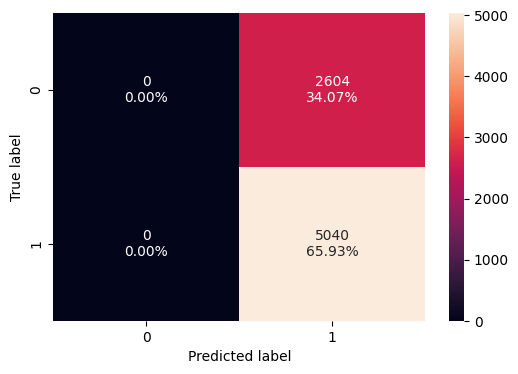

In [63]:
# Metrics - Test data

confusion_matrix_sklearn(bagging_tuned,X_test,Y_test)

print('***** Test Metrics*****\n')
bagging_tuned_testing_metrics = metrics_classification(bagging_tuned,X_test,Y_test)

> Bagging classifier Hyper parameter tuning gives a generalized model

> Recall score is high


In [64]:
#Random forest

rf = RandomForestClassifier(random_state=1)
rf.fit(X_Train,Y_train)

RandomForestClassifier(random_state=1)

***** Test Metrics*****



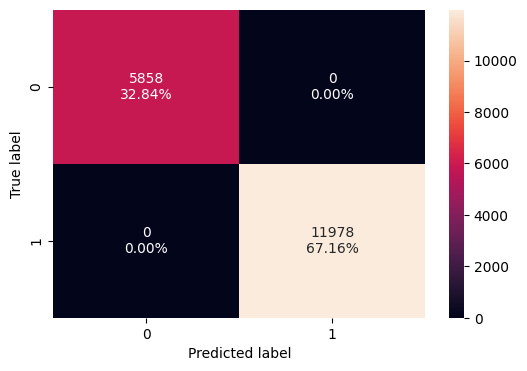

In [65]:
# Metrics - Random forest - Training data

confusion_matrix_sklearn(rf,X_Train,Y_train)

print('***** Test Metrics*****\n')
randomforest_classifier_training_metrics = metrics_classification(rf,X_Train,Y_train)


***** Test Metrics*****



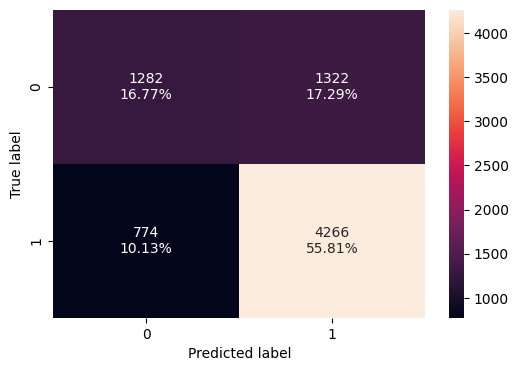

In [66]:
# Metrics - Randomforest - Test data

confusion_matrix_sklearn(rf,X_test,Y_test)

print('***** Test Metrics*****\n')
randomforest_classifier_testing_metrics = metrics_classification(rf,X_test,Y_test)

>Random forest model is overfitting and Recall is low.

> let's try Hyper parameter tuning

In [67]:
# Random forest classifier - Hyper parameter tuning

rf_tuned = RandomForestClassifier(class_weight={0:0.7,0:3}, random_state=1)

param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scoring_metric = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(rf_tuned,param_grid,scoring=scoring_metric,n_jobs=-100)
grid_obj.fit(X_Train,Y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_Train,Y_train)

RandomForestClassifier(class_weight={0: 3}, max_samples=0.4, n_estimators=110,
                       random_state=1)

***** Test Metrics*****



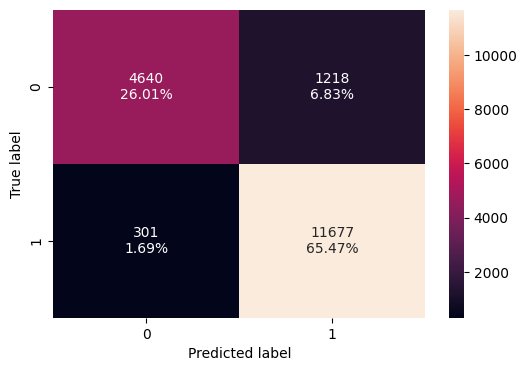

In [68]:
# Metrics - Hyperparameter tuning - Training data

confusion_matrix_sklearn(rf_tuned,X_Train,Y_train)


print('***** Test Metrics*****\n')
randomforest_tuned_training_metrics = metrics_classification(rf_tuned,X_Train,Y_train)

***** Test Metrics*****



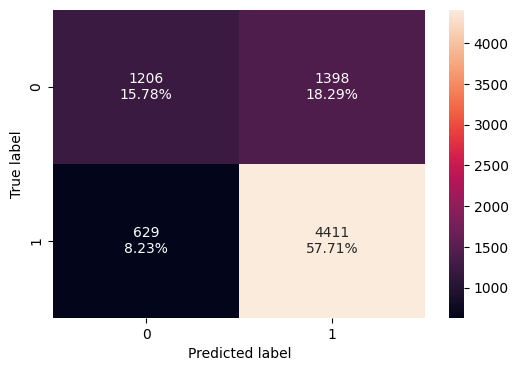

In [69]:
# Metrics - Hyperparameter tuning - Test data

confusion_matrix_sklearn(rf_tuned,X_test,Y_test)


print('***** Test Metrics*****\n')
randomforest_tuned_testing_metrics = metrics_classification(rf_tuned,X_test,Y_test)

> Random forest Hyperparameter tuning is overfitting and Recall score is low

In [70]:
#Boosting - Adaptive

adaboost_classifier = AdaBoostClassifier(random_state=1)
adaboost_classifier.fit(X_Train,Y_train)

AdaBoostClassifier(random_state=1)

***** Test Metrics*****



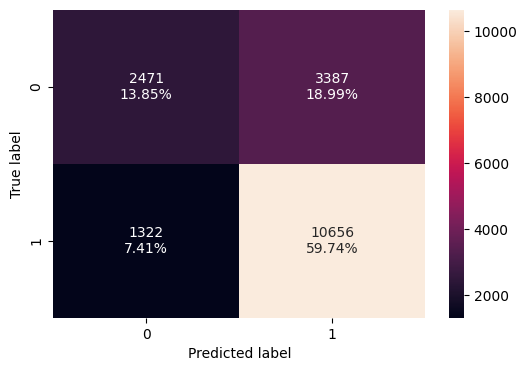

In [71]:
# Metrics - AdaBoosting - Training data

confusion_matrix_sklearn(adaboost_classifier,X_Train,Y_train)


print('***** Test Metrics*****\n')
adaboost_classifier_training_metrics = metrics_classification(adaboost_classifier,X_Train,Y_train)

***** Test Metrics*****



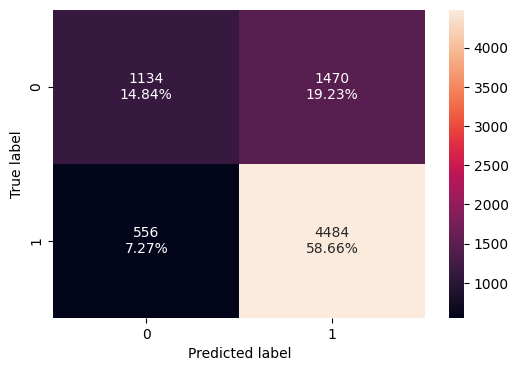

In [72]:
# Metrics - AdaBoosting - Test data

confusion_matrix_sklearn(adaboost_classifier,X_test,Y_test)

print('***** Test Metrics*****\n')
adaboost_classifier_testing_metrics = metrics_classification(adaboost_classifier,X_test,Y_test)

> AdaBoost technique gives a generalized model, that works good in both training and testing data

> This model is a right fit with almost same metrics in both Training and Testing data

> Let's try with Hyper parameter tuning to check te value increse of Recall.

In [73]:
#Adaboost - Hyperparameter tuning

adaboost_tuned = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

scoring_metric = metrics.make_scorer(recall_score)

grid_obj = GridSearchCV(adaboost_tuned,param_grid,scoring=scoring_metric,n_jobs=-200)
grid_obj = grid_obj.fit(X_Train,Y_train)

adaboost_tuned = grid_obj.best_estimator_

adaboost_tuned.fit(X_Train,Y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

***** Test Metrics*****



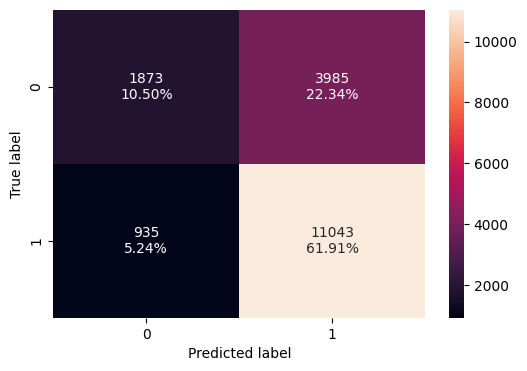

In [74]:
# Metrics - Hyperparameter tuning - Training data

confusion_matrix_sklearn(adaboost_tuned,X_Train,Y_train)


print('***** Test Metrics*****\n')
adaboost_tuned_training_metrics = metrics_classification(adaboost_tuned,X_Train,Y_train)

***** Test Metrics*****



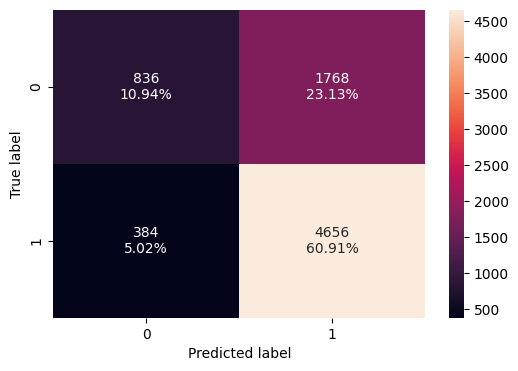

In [75]:
# Metrics - Hyperparameter tuning - Test data

confusion_matrix_sklearn(adaboost_tuned,X_test,Y_test)

print('***** Test Metrics*****\n')
adaboost_tuned_testing_metrics = metrics_classification(adaboost_tuned,X_test,Y_test)

>After Hyperparameter tuning, model is generalized and Recall score is good.

In [76]:
# Boosting - Gradient

gradientboost = GradientBoostingClassifier(random_state=1)
gradientboost.fit(X_Train,Y_train)

GradientBoostingClassifier(random_state=1)

***** Test Metrics*****



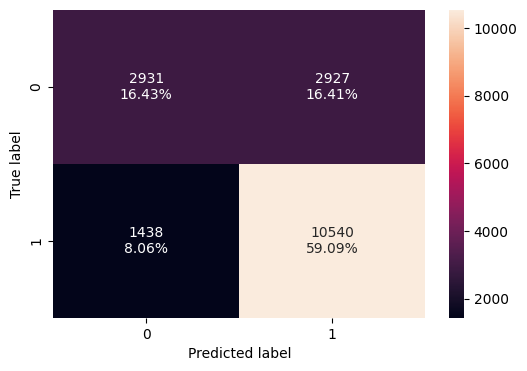

In [77]:
# Metrics - Gradient Boosting - Training data

confusion_matrix_sklearn(gradientboost,X_Train,Y_train)


print('***** Test Metrics*****\n')
gradientboost_classifier_training_metrics = metrics_classification(gradientboost,X_Train,Y_train)

***** Test Metrics*****



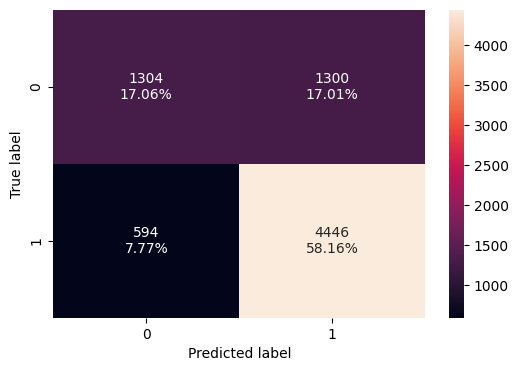

In [78]:
# Metrics - Gradient Boosting - Test data

confusion_matrix_sklearn(gradientboost,X_test,Y_test)


print('***** Test Metrics*****\n')
gradientboost_classifier_testing_metrics = metrics_classification(gradientboost,X_test,Y_test)

> Gradient Boost technique also gives a generalized model, that works good in both training and testing data

> This model is a right fit with almost same metrics in both Training and Testing data

> Let's try with Hyper parameter tuning to check te value increse of Recall.

In [79]:
#Hyperparameter tuning

gradientboost_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

scoring_metric = metrics.make_scorer(recall_score)

grid_obj = GridSearchCV(gradientboost_tuned,param_grid,scoring=scoring_metric,n_jobs=-200)
grid_obj = grid_obj.fit(X_Train,Y_train)

gradientboost_tuned = grid_obj.best_estimator_

gradientboost_tuned.fit(X_Train,Y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.7)

***** Test Metrics*****



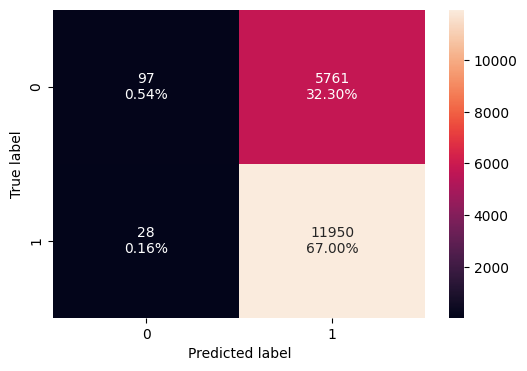

In [80]:
# Metrics - Hyperparameter tuning - Training data

confusion_matrix_sklearn(gradientboost_tuned,X_Train,Y_train)

print('***** Test Metrics*****\n')
gradientboost_tuned_training_metrics = metrics_classification(gradientboost_tuned,X_Train,Y_train)

***** Test Metrics*****



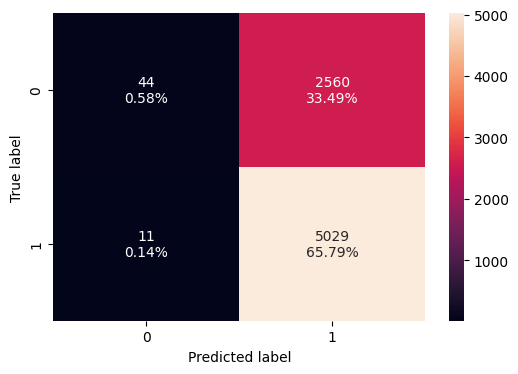

In [81]:
# Metrics - Hyperparameter tuning - Test data

confusion_matrix_sklearn(gradientboost_tuned,X_test,Y_test)

print('***** Test Metrics*****\n')
gradientboost_tuned_testing_metrics = metrics_classification(gradientboost_tuned,X_test,Y_test)

> Gradient boost technique with hyper parameter tuning has made the model more generalized and recall value is high

In [82]:
# Boosting - XG

xg = XGBClassifier(random_state=1)
xg.fit(X_Train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

***** Test Metrics*****



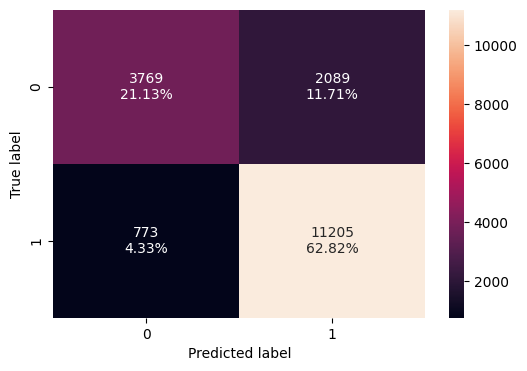

In [83]:
# Metrics - XB Boosting - Training data

confusion_matrix_sklearn(xg,X_Train,Y_train)


print('***** Test Metrics*****\n')
xgboost_classifier_training_metrics = metrics_classification(xg,X_Train,Y_train)

***** Test Metrics*****



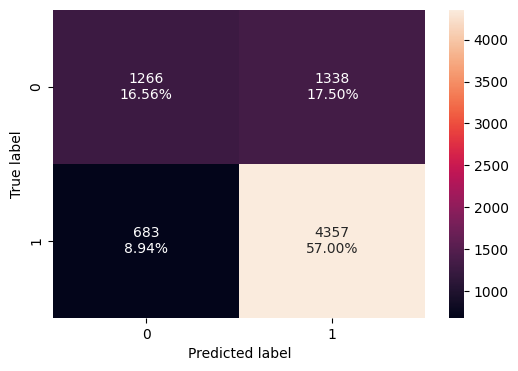

In [84]:
# Metrics - XG Boosting - Test data

confusion_matrix_sklearn(xg,X_test,Y_test)


print('***** Test Metrics*****\n')
xgboost_classifier_testing_metrics = metrics_classification(xg,X_test,Y_test)

> XGBoost is slightly overfitting, let's try Hyperparameter tuning


In [85]:
#Hyper parameter tuning

xg_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

scoring_metric = metrics.make_scorer(recall_score)

grid_obj = GridSearchCV(xg_tuned,param_grid,scoring=scoring_metric,n_jobs=-200)
grid_obj = grid_obj.fit(X_Train,Y_train)

xg_tuned = grid_obj.best_estimator_

xg_tuned.fit(X_Train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

***** Test Metrics*****



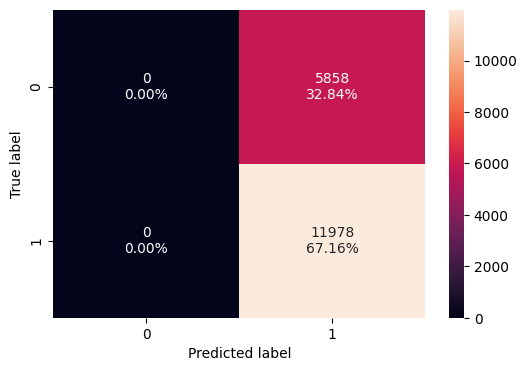

In [86]:
# Metrics - Hyperparameter tuning - Training data

confusion_matrix_sklearn(xg_tuned,X_Train,Y_train)

print('***** Test Metrics*****\n')
xgboost_tuned_training_metrics = metrics_classification(xg_tuned,X_Train,Y_train)

***** Test Metrics*****



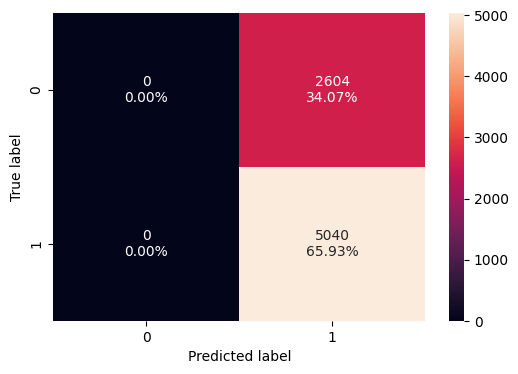

In [87]:
# Metrics - Hyperparameter tuning - Test data

confusion_matrix_sklearn(xg_tuned,X_test,Y_test)

print('***** Test Metrics*****\n')
xgboost_tuned_test_metrics = metrics_classification(xg_tuned,X_test,Y_test)

> After tuning, recall value is best and the model is generalised.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?

> Hyper parameter tuning is done above

> From the results, tuning helped in increase of Recall score which is the metric considered for this case study

> Also tuning helped to fix overfitting


## Model Performance Comparison and Conclusions

In [92]:
#Print the metrics for all models

df_model_training_perf = pd.concat([dtree_classification_training_metrics.T,dtree_tuned_training_metrics.T,
                                   bagging_classifier_training_metrics.T,bagging_tuned_training_metrics.T,
                                   randomforest_classifier_training_metrics.T,randomforest_tuned_training_metrics.T,
                                   adaboost_classifier_training_metrics.T,adaboost_tuned_training_metrics.T,
                                   gradientboost_classifier_training_metrics.T,gradientboost_tuned_training_metrics.T,
                                   xgboost_classifier_training_metrics.T,xgboost_tuned_training_metrics.T],axis=1)


df_model_training_perf.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Training performance comparison:")

df_model_training_perf

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,1.0,0.708455,0.984806,0.671563,1.0,0.914835,0.735983,0.724153,0.755270,0.675432,0.839538,0.671563
Recall,1.0,0.725330,0.985473,1.000000,1.0,0.974871,0.889631,0.921940,0.879947,0.997662,0.935465,1.000000
Precision,1.0,0.819777,0.991849,0.671563,1.0,0.905545,0.758812,0.734828,0.782654,0.674722,0.842861,0.671563
F1,1.0,0.769667,0.988651,0.803515,1.0,0.938930,0.819031,0.817818,0.828454,0.805012,0.886752,0.803515


In [98]:
df_model_testing_perf = pd.concat([dtree_classification_testing_metrics.T,dtree_tuned_testing_metrics.T,
                                   bagging_classifier_testing_metrics.T,bagging_tuned_testing_metrics.T,
                                   randomforest_classifier_testing_metrics.T,randomforest_tuned_testing_metrics.T,
                                   adaboost_classifier_testing_metrics.T,adaboost_tuned_testing_metrics.T,
                                   gradientboost_classifier_testing_metrics.T,gradientboost_tuned_testing_metrics.T,
                                   xgboost_classifier_testing_metrics.T,xgboost_tuned_test_metrics.T],axis=1,)

df_model_testing_perf.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Testing performance comparison:")

df_model_testing_perf

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,0.654239,0.654239,0.699634,0.659341,0.725798,0.734825,0.734956,0.718472,0.752224,0.663658,0.735610,0.659341
Recall,0.743849,0.743849,0.778968,1.000000,0.846429,0.875198,0.889683,0.923810,0.882143,0.997817,0.864484,1.000000
Precision,0.734954,0.734954,0.768598,0.659341,0.763422,0.759339,0.753107,0.724782,0.773756,0.662670,0.765057,0.659341
F1,0.739375,0.739375,0.773749,0.794702,0.802785,0.813163,0.815718,0.812282,0.824402,0.796421,0.811737,0.794702


**Conclusion:**

> Random forest after hyperparameter tuning and XGBoost after hyperparameter tuning gives same high recall score i.e., 1

> Comparing these two, Random forest after tuning is more generalized, hence forms the best fit.

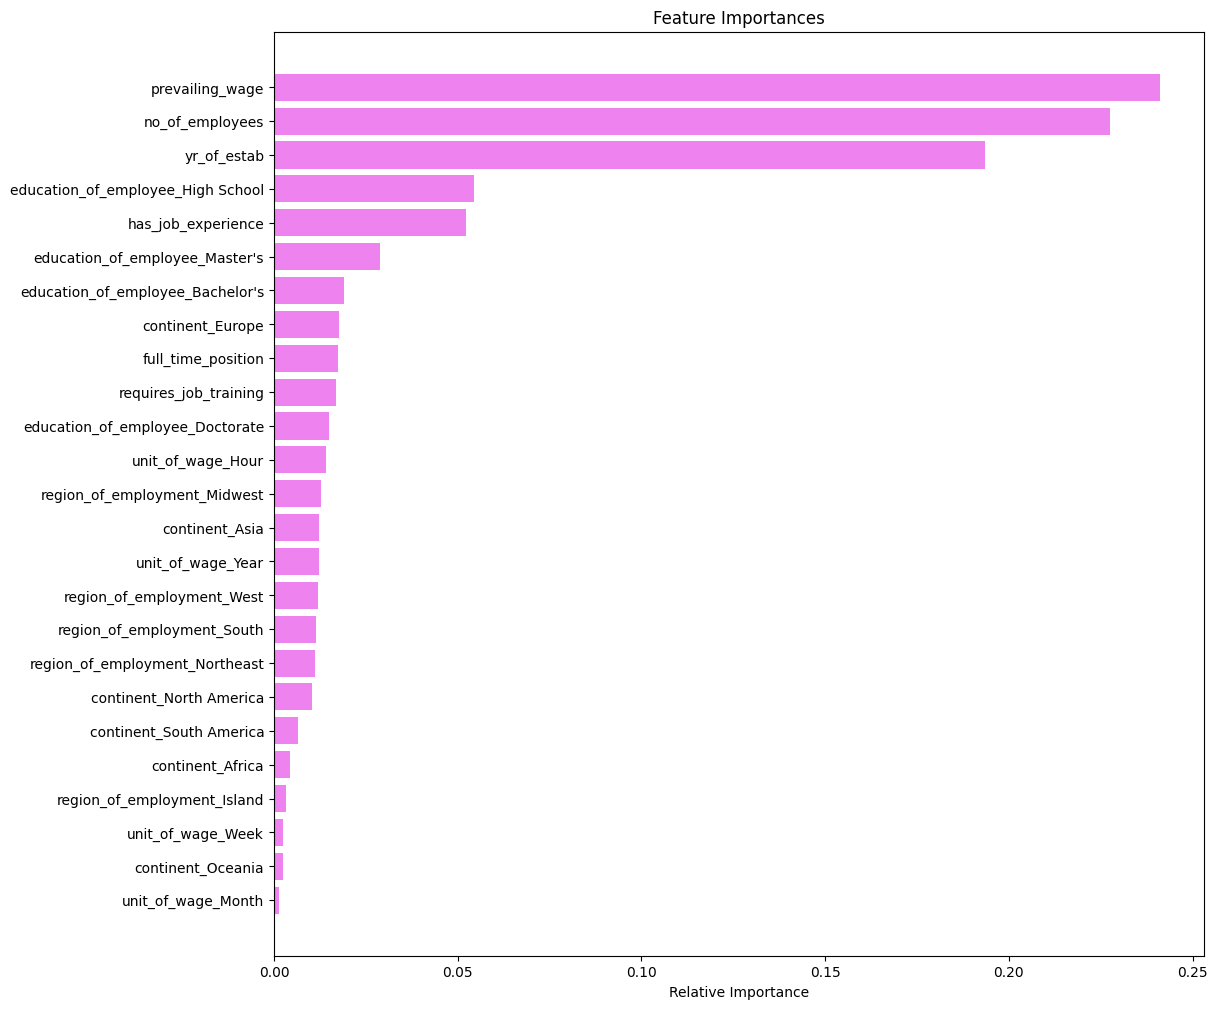

In [102]:
feature_names = X_Train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

> Best candidate for visa is based on the following factors

    >Salary plays an important role.When the salary match the average salary of local employee, then the profile is more suitable
    >Size of the company (based on number of employees). If the company is bigger, that makes the candidate suitable
    >Employing company's year of establishment. If the Company is stable i.e., estabilished for a while then the profile is fit
    >Education - If the applicant has good educational qualification, then the candidate is apt
    >Job experience - when the candidate has the right job experience, that makes the profile more worthy
    >Continent
    >Job training - when the applicant has related job training, he becomes a good fit
    >Type of wage - yearly. Annual salary makes a profile more suitable for visa approval
> OLFC may select the applicants whose salary matches the National average salary, applying for a stable company, has sound Educational qualification, related job experience, already have job training and with Annual salary package
>This model - Random forest with Hyperparameter tuning will help identifying right candidates for OLFC.